# Berry Chemistry

Env: ` qiime2-2023.2 `

In [19]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from matplotlib.ticker import MaxNLocator,  FuncFormatter

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
workdir = '/Users/lfloerl/Desktop/MICROTERROIR/Data/Berry_Chemistry'
%cd $workdir

/Users/lfloerl/Desktop/MICROTERROIR/Data/Berry_Chemistry


In [6]:
# Import data
hplc_data = pd.read_csv('MASTER_berry_chemistry.csv')
must2023_data = pd.read_excel('2023_C13_data.xlsx')

In [14]:
plots_md = pd.read_csv('/Users/lfloerl/Desktop/MICROTERROIR/Data/Lavaux_plots_md.csv', index_col=0)

,Altitude,Average_slope,Exposition,Min_radiation,Max_radiation,Average_radiation,Soil_thickness,Soil_type,Soil_depth,Hydromorphie,Hydromorphie_code,Geology,Coordinates,Longitude,Latitude
Plot,,,,,,,,,,,,,,,
4,450,30,South-West,925,950,937.5,calcosol,Calcaire,100-180,Slightly_redox,1,Molasse,46°29′55.815″N 6°42′29.007″E,46.498857,6.708072
5,400,30,South-West,900,925,912.5,calcosol,Calcaire,100-180,no_redox,0,Molasse,46°29′47.037″N 6°42′31.353″E,46.496407,6.708712
9,520,35,South-West,875,900,887.5,calcosol,Calcaire,100-180,no_redox,0,Molasse,46°29′57.936″N 6°42′44.103″E,46.499468,6.712242
11,490,20,South,925,950,937.5,calcosol,Calcaire,100-180,Slightly_redox,1,Gravel_moraine,46°30′00.818″N 6°42′23.968″E,46.500244,6.706655
12,520,15,South-West,925,950,937.5,colluviosol,Calcique,above_150,Slightly_redox,1,Colluvium,46°30′09.426″N 6°42′17.825″E,46.502628,6.704952


# HPLC data

## Swarmplots

/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/vs/cscnsm_n1pq4d37fdkylmm940000gq/T/ipykernel_18784/2629977515.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation=90, horizontalal

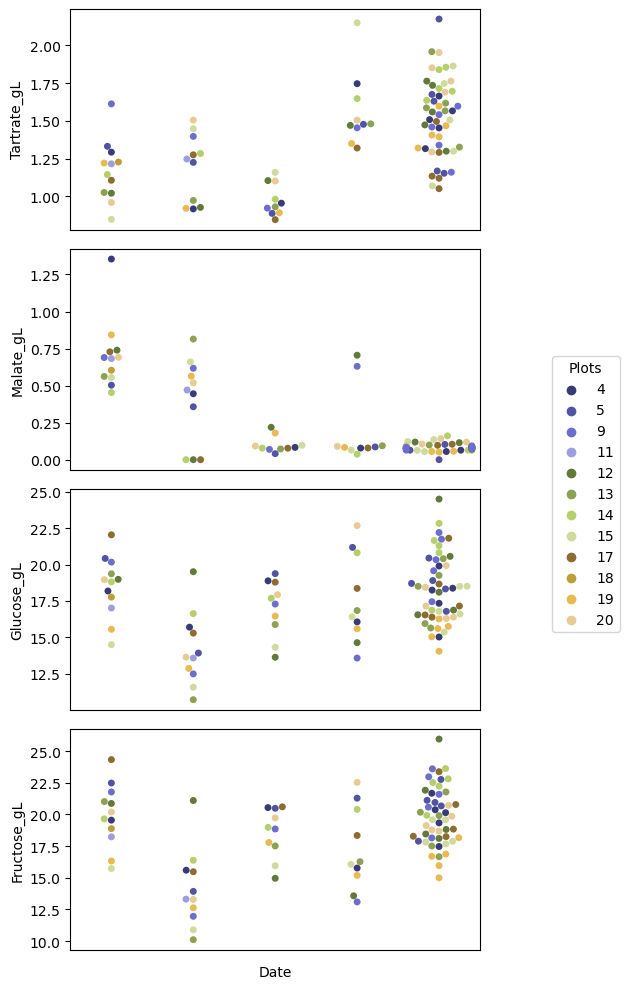

In [12]:
# Set up the plot
fig, axes = plt.subplots(4,1, figsize=(5, 10))

measurements = ['Tartrate_gL', 'Malate_gL', 'Glucose_gL', 'Fructose_gL']

# Create swarmplots for each measurement
for i, measurement in enumerate(measurements):
    sns.swarmplot(ax=axes[i], data=hplc_data[hplc_data['Date'] != '2021-08-31'], y=measurement, x='Date', hue='Plot_No', palette='tab20b' , )
    axes[i].set(xlabel=None)
    axes[i].tick_params(bottom=False)
    axes[i].set(xticklabels=[])
    axes[i].get_legend().remove() 

# Add a single legend to the side
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.1, 0.5), title='Plots')

# Add x-axis labels only to the bottom subplot
axes[-1].set_xlabel('Date')
axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation=90, horizontalalignment='right')

plt.tight_layout()
plt.show()

## ANOVA 

In [10]:
# ANOVA only for harvest samples 
measurement_col = [ 'Brix_degree', 'Tartrate_gL', 'Malate_gL', 'Glucose_gL', 'Fructose_gL']

for col in measurement_col: 
    # Perform nested ANOVA (specifies both the main effects of individual categories as well as their interaction term)
    model = ols((str(col)+'~ Plot_No * Year'), data=hplc_data[hplc_data['Pheno_Stage']=='Harvest']).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print('\n', col)
    print(anova_table)


 Brix_degree
                 sum_sq    df         F    PR(>F)
Plot_No        0.278865   1.0  0.168991  0.682579
Year           5.253633   1.0  3.183670  0.079795
Plot_No:Year   1.539181   1.0  0.932735  0.338306
Residual      92.410154  56.0       NaN       NaN

 Tartrate_gL
                sum_sq    df          F        PR(>F)
Plot_No       0.009074   1.0   0.130325  7.192149e-01
Year          2.141245   1.0  30.754553  5.187700e-07
Plot_No:Year  0.058411   1.0   0.838953  3.629333e-01
Residual      4.734411  68.0        NaN           NaN

 Malate_gL
                sum_sq    df           F        PR(>F)
Plot_No       0.000615   1.0    0.032378  8.577358e-01
Year          3.099564   1.0  163.227526  9.663235e-20
Plot_No:Year  0.042040   1.0    2.213911  1.413944e-01
Residual      1.291267  68.0         NaN           NaN

 Glucose_gL
                  sum_sq    df         F    PR(>F)
Plot_No        21.896356   1.0  4.405723  0.039534
Year            0.156628   1.0  0.031515  0.859624

In [13]:
# ANOVA only for veraison samples 
measurement_col = [ 'Brix_degree', 'Tartrate_gL', 'Malate_gL', 'Glucose_gL', 'Fructose_gL']

for col in measurement_col: 
    # Perform nested ANOVA (specifies both the main effects of individual categories as well as their interaction term)
    model = ols((str(col)+'~ Plot_No * Year'), data=hplc_data[hplc_data['Pheno_Stage']=='Veraison']).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print('\n', col)
    print(anova_table)


 Brix_degree
                  sum_sq    df         F    PR(>F)
Plot_No         0.025290   1.0  0.005970  0.938943
Year           13.931133   1.0  3.288556  0.080126
Plot_No:Year    3.238572   1.0  0.764491  0.389110
Residual      122.851138  29.0       NaN       NaN

 Tartrate_gL
                sum_sq    df          F    PR(>F)
Plot_No       0.002735   1.0   0.047845  0.829460
Year          0.704541   1.0  12.325979  0.002680
Plot_No:Year  0.044241   1.0   0.774006  0.391248
Residual      0.971704  17.0        NaN       NaN

 Malate_gL
                sum_sq    df         F    PR(>F)
Plot_No       0.015951   1.0  0.200306  0.660124
Year          0.227851   1.0  2.861194  0.108988
Plot_No:Year  0.009962   1.0  0.125097  0.727919
Residual      1.353794  17.0       NaN       NaN

 Glucose_gL
                  sum_sq    df         F    PR(>F)
Plot_No         0.295846   1.0  0.035993  0.851776
Year           61.727221   1.0  7.509918  0.013945
Plot_No:Year    4.764304   1.0  0.579639  0.

## ANOVA with plot metadata

In [35]:
# rename the index to merge 
plots_md.rename_axis(index='Plot_No', inplace=True)

# Merge hplc_data and plots_md on Plot_No
merged_data = pd.merge(hplc_data, plots_md, on='Plot_No')

Check out all plot metadata: 

In [34]:
# ANOVA only for veraison samples 
measurement_col = [ 'Brix_degree', 'Tartrate_gL', 'Malate_gL', 'Glucose_gL', 'Fructose_gL']

for col in measurement_col: 
    # Perform nested ANOVA (specifies both the main effects of individual categories as well as their interaction term)
    model = ols((str(col)+'~ Year + Plot_No + Altitude + Average_slope + Exposition + Average_radiation + Soil_thickness + Soil_type + Soil_depth + Hydromorphie + Geology'), 
                data=merged_data[merged_data['Pheno_Stage']=='Harvest']).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print('\n', col)
    print(anova_table)


 Brix_degree
                      sum_sq    df         F    PR(>F)
Exposition          5.476008   1.0  3.977846  0.051681
Soil_thickness      5.297615   1.0  3.848259  0.055492
Soil_type           5.228909   1.0  3.798349  0.057040
Soil_depth          6.716539   2.0  2.439492  0.097730
Hydromorphie        5.591673   1.0  4.061866  0.049364
Geology             8.625865   3.0  2.088648  0.113793
Year                5.253633   1.0  3.816310  0.056478
Plot_No             4.774009   1.0  3.467904  0.068572
Altitude            4.906793   1.0  3.564360  0.064961
Average_slope       5.265593   1.0  3.824998  0.056208
Average_radiation   5.386488   1.0  3.912817  0.053556
Residual           67.454700  49.0       NaN       NaN

 Tartrate_gL
                     sum_sq    df          F        PR(>F)
Exposition         0.001289   1.0   0.019182  8.903190e-01
Soil_thickness     0.002766   1.0   0.041179  8.398913e-01
Soil_type          0.001060   1.0   0.015781  9.004577e-01
Soil_depth         0.

More investigations! 

In [45]:
## BRIX 

model = ols(('Brix_degree ~ Average_radiation *  Average_slope * Year * Geology * Hydromorphie * Soil_type'), 
            data=merged_data[merged_data['Pheno_Stage']=='Harvest']).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

significant_lines = anova_table[anova_table['PR(>F)'] < 0.05]
significant_lines

/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1900: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have f

,sum_sq,df,F,PR(>F)
Average_radiation:Geology:Hydromorphie,381.840688,3.0,89.988547,5.289113e-12
Average_radiation:Average_slope:Geology,3043.519462,3.0,717.267443,5.005598e-28
Average_radiation:Average_slope:Geology:Hydromorphie,45.120345,3.0,10.633530,2.207250e-03
Average_radiation:Average_slope:Geology:Hydromorphie:Soil_type,35.272116,3.0,8.312594,6.182890e-03


In [46]:
## FRUCTOSE

model = ols(('Fructose_gL ~ Average_radiation *  Average_slope * Year * Geology * Hydromorphie'), 
            data=merged_data[merged_data['Pheno_Stage']=='Harvest']).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

significant_lines = anova_table[anova_table['PR(>F)'] < 0.05]
significant_lines

/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have f

,sum_sq,df,F,PR(>F)
Average_radiation,1602.047091,1.0,433.876486,3.455675e-27
Average_radiation:Geology:Hydromorphie,92.341713,3.0,8.336188,7.115477e-04
Average_slope:Hydromorphie,21.954030,1.0,5.945729,1.813770e-02
Average_radiation:Average_slope,864.192020,1.0,234.045927,4.344169e-21
Average_radiation:Average_slope:Geology,725.130200,3.0,65.461443,4.791401e-15
Average_radiation:Average_slope:Hydromorphie,26.707216,1.0,7.233017,9.548503e-03
Average_radiation:Average_slope:Geology:Hydromorphie,49.746457,3.0,4.490883,1.578759e-02
Year:Geology,3016.525058,3.0,272.318107,1.311392e-28
Average_slope:Year:Geology,51.709765,3.0,4.668121,1.357326e-02


In [47]:
## GLUCOSE

model = ols(('Glucose_gL ~ Average_radiation *  Average_slope * Year * Geology * Hydromorphie'), 
            data=merged_data[merged_data['Pheno_Stage']=='Harvest']).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

significant_lines = anova_table[anova_table['PR(>F)'] < 0.05]
significant_lines

/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have f

,sum_sq,df,F,PR(>F)
Average_radiation:Hydromorphie,17.496015,1.0,4.471844,3.917791e-02
Average_radiation:Geology:Hydromorphie,82.405849,3.0,7.020762,1.973321e-03
Average_radiation:Average_slope,22.237271,1.0,5.683672,2.073619e-02
Average_radiation:Average_slope:Geology,597.756173,3.0,50.927259,4.574333e-13
Average_radiation:Average_slope:Geology:Hydromorphie,62.876771,3.0,5.356936,7.605181e-03
Year:Hydromorphie,25.025826,1.0,6.396404,1.444642e-02


In [61]:
## MALATE

model = ols(('Malate_gL ~ Year * Altitude'), 
            data=merged_data[merged_data['Pheno_Stage']=='Harvest']).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

significant_lines = anova_table[anova_table['PR(>F)'] < 0.05]
significant_lines

,sum_sq,df,F,PR(>F)
Year,3.099006,1.0,158.09721,2.081664e-19


In [66]:
## TARTRATE

model = ols(('Tartrate_gL ~  Average_radiation +  Average_slope + Year + Geology + Hydromorphie + Altitude + Soil_type + Soil_depth + Year:Soil_depth'), 
            data=merged_data[merged_data['Pheno_Stage']=='Harvest']).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

significant_lines = anova_table[anova_table['PR(>F)'] < 0.05]
significant_lines

,sum_sq,df,F,PR(>F)
Year,2.166171,1.0,32.845205,3.597055e-07


# Must 2023 data

In [70]:
must2023_data.columns

Index(['Plot ', 'TAV_percVol', 'GluFru_gL', 'DegTotal_percVol', 'AT_gL', 'pH',
       'AcMal_gL', 'AcTart_gL', 'KF_mgL', 'AcGluc_gL', 'Glyc_gL', 'CitrF_gL',
       'NOPAF_mgL', 'NH3F_mgL', 'Nass_mgL', 'D13'],
      dtype='object')

ValueError: Unable to parse string "≤ 0,3" at position 1

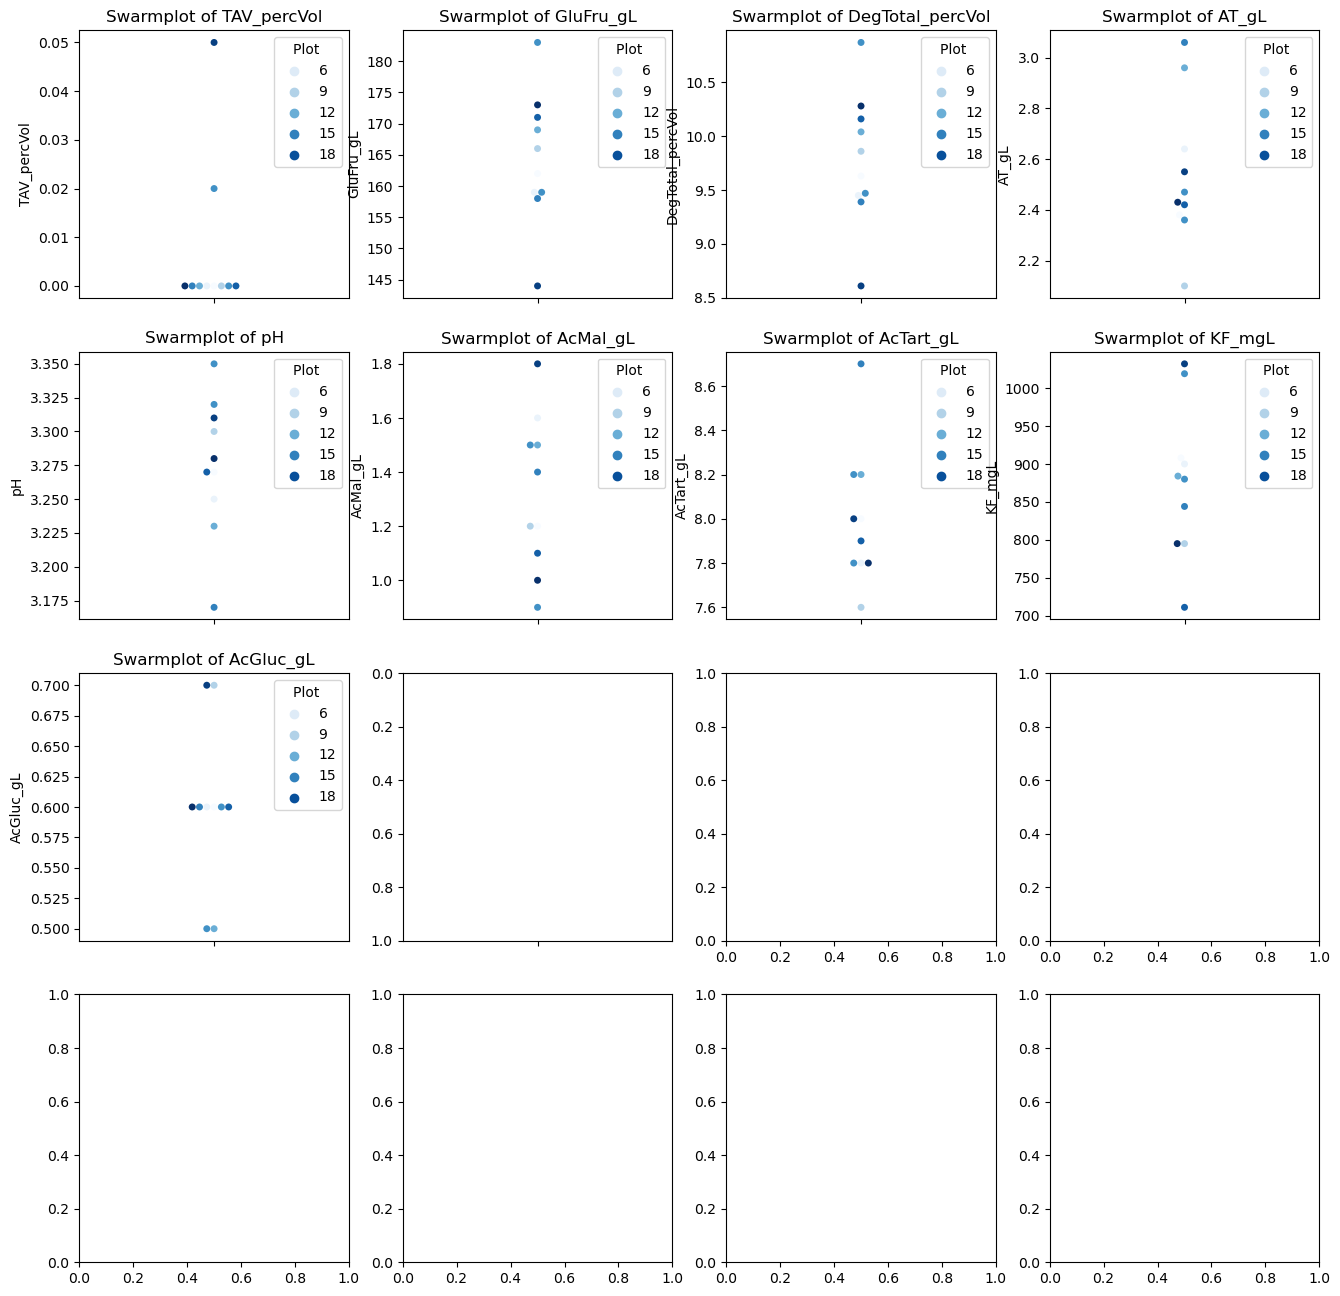

In [68]:
# Get the column names
must_measurements = ['TAV_percVol', 'GluFru_gL', 'DegTotal_percVol', 'AT_gL', 'pH',
       'AcMal_gL', 'AcTart_gL', 'KF_mgL', 'AcGluc_gL', 'Glyc_gL', 'CitrF_gL',
       'NOPAF_mgL', 'NH3F_mgL', 'Nass_mgL', 'D13']

#Calculate the number of rows and columns for subplots
num_cols = len(must_measurements)
num_rows = (num_cols + 3) // 4  # To ensure at least 2 plots per row

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(16, 4*num_rows))  # Adjust figsize as needed

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Loop over each column
for i, column in enumerate(must_measurements):
    # Calculate the row and column index for the subplot
    row_index = i // 4
    col_index = i % 4

    # Create a scatterplot for the current column in the corresponding subplot
    sns.swarmplot(data=must2023_data, y=column, hue='Plot ', 
                 ax=axes[row_index, col_index], palette='Blues')  # Use df.index assuming your DataFrame has index
    axes[row_index, col_index].set_title(f"Swarmplot of {column}")
    axes[row_index, col_index].set_ylabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()
